In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [10]:
#calling our dataset
Healthcare_Metrics= pd.read_csv('cleaned_healthcare_metrics.csv')
Healthcare_Metrics.head()

,YEAR,COUNTY,HOSPITAL,OSHPDID,Procedure/Condition,Risk Adjusted Mortality Rate,Deaths,Cases,Hospital Ratings,Longitude,Latitude
0,2016,AAAA,STATEWIDE,None,AAA Repair Unruptured,1.3,30.0,2358.0,Unknown,-119.00658,34.8325
1,2016,AAAA,STATEWIDE,None,AMI,6.1,3178.0,52167.0,Unknown,-119.00658,34.8325
2,2016,AAAA,STATEWIDE,None,Acute Stroke,9.1,5482.0,60184.0,Unknown,-119.00658,34.8325
3,2016,AAAA,STATEWIDE,None,Acute Stroke Hemorrhagic,21.1,2580.0,12210.0,Unknown,-119.00658,34.8325
4,2016,AAAA,STATEWIDE,None,Acute Stroke Ischemic,5.0,2258.0,45141.0,Unknown,-119.00658,34.8325


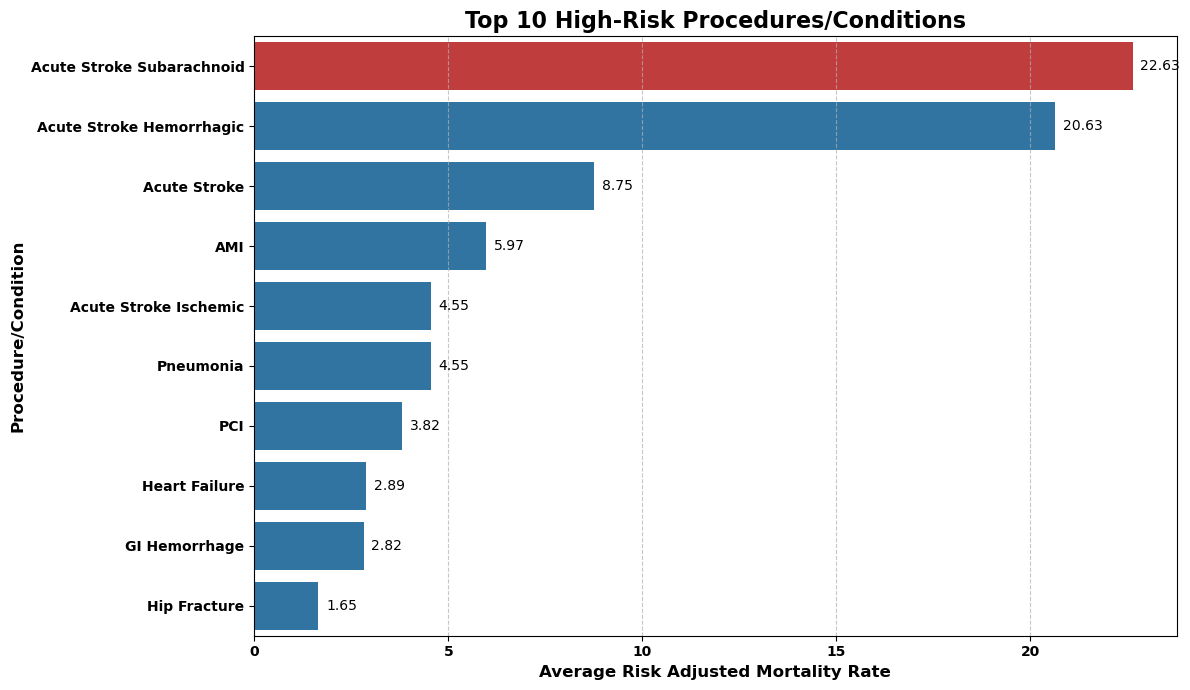

In [11]:


# Ensure correct dataset with procedure names and mortality rate
top_risks = Healthcare_Metrics.groupby('Procedure/Condition')['Risk Adjusted Mortality Rate'].mean().sort_values(ascending=False).head(10)

# Highlight the highest risk procedure in red and the rest in shades of blue
highlighted_procedure = top_risks.idxmax()
colors = ['#1f77b4' if proc != highlighted_procedure else '#d62728' for proc in top_risks.index]

# Plot the bar chart
plt.figure(figsize=(12, 7))
sns.barplot(
    x=top_risks.values,
    y=top_risks.index,
    palette=colors
)

# Add chart title and labels
plt.title('Top 10 High-Risk Procedures/Conditions', fontsize=16, weight='bold')
plt.xlabel('Average Risk Adjusted Mortality Rate', fontsize=12, weight='bold')
plt.ylabel('Procedure/Condition', fontsize=12, weight='bold')

# Add data labels to each bar
for index, value in enumerate(top_risks.values):
    plt.text(value + 0.2, index, f"{value:.2f}", va='center', fontsize=10, color='black')

# Customize ticks and layout
plt.xticks(fontsize=10, weight='bold')
plt.yticks(fontsize=10, weight='bold')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the chart as an image
plt.savefig('top_10_high_risk_procedures.png', dpi=300, bbox_inches='tight')

# Display the chart
plt.show()


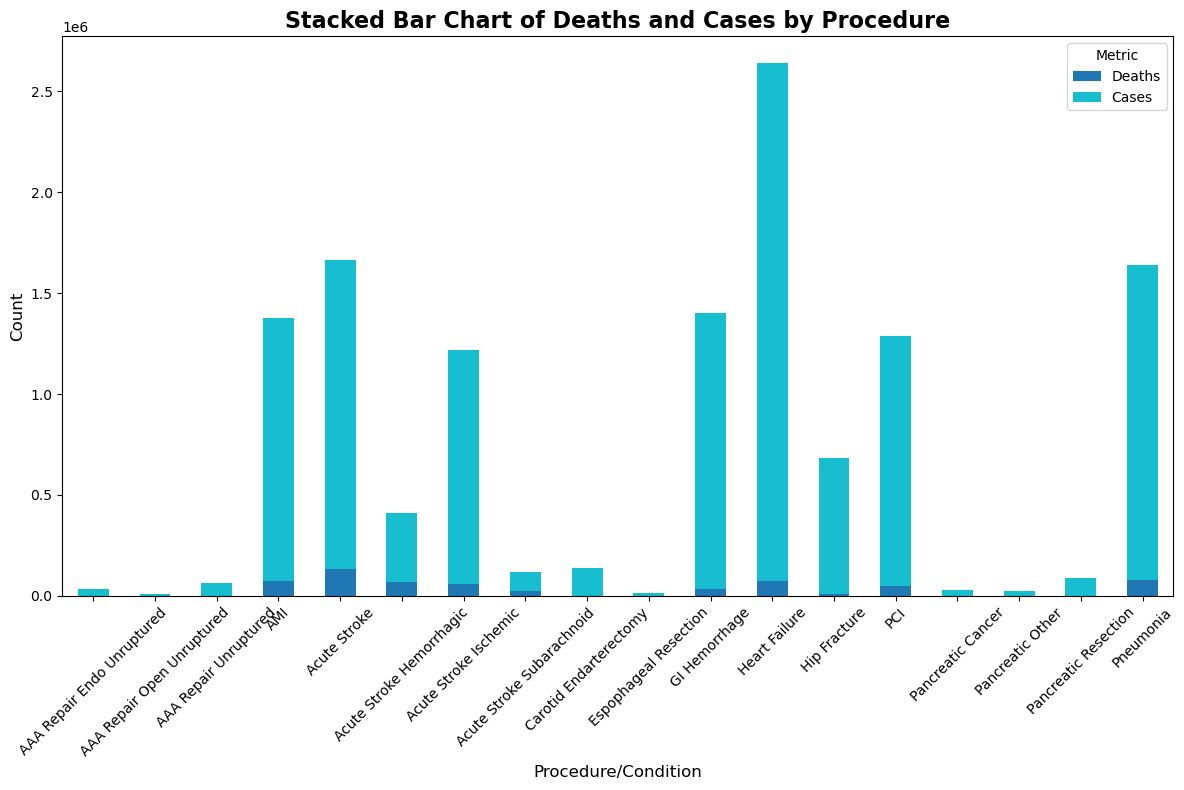

In [12]:
# Grouping our data by Procedure/Condition
stacked_data = Healthcare_Metrics.groupby('Procedure/Condition')[['Deaths', 'Cases']].sum()

# Plot stacked bar chart
stacked_data.plot(
    kind='bar',
    stacked=True,
    figsize=(12, 8),
    colormap="tab10"
)
plt.title('Stacked Bar Chart of Deaths and Cases by Procedure', fontsize=16, weight='bold')
plt.xlabel('Procedure/Condition', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Metric', loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()


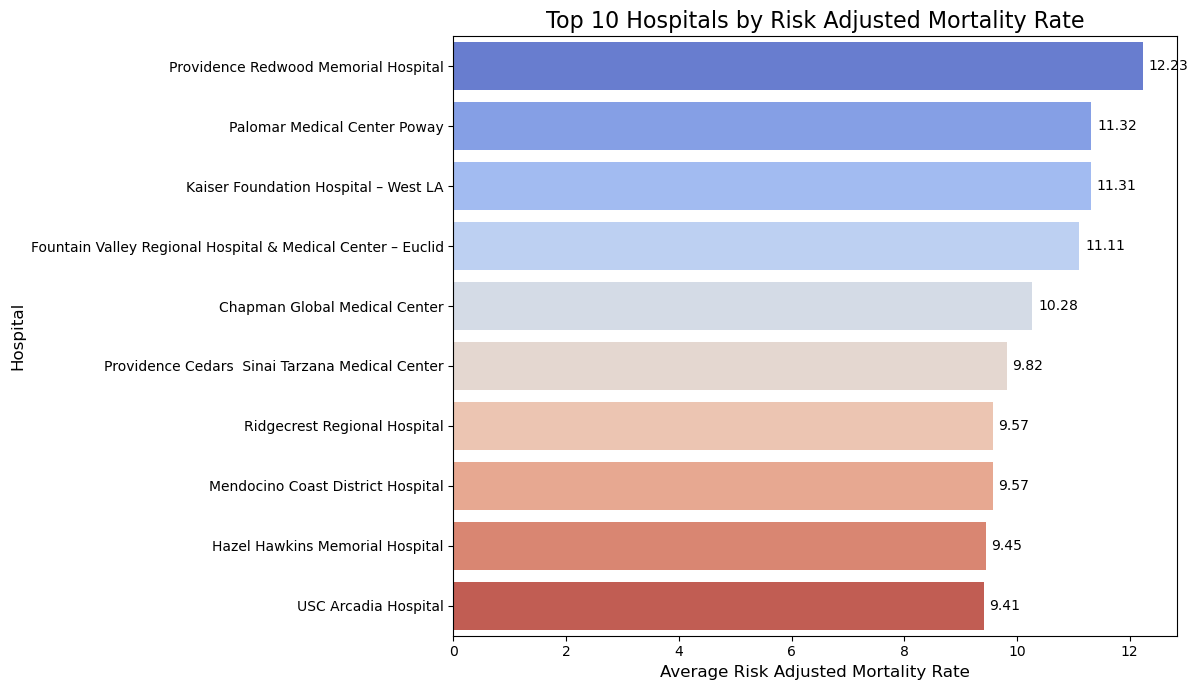

In [13]:
# Group by HOSPITAL and calculate average Risk Adjusted Mortality Rate
hospital_risk = Healthcare_Metrics.groupby('HOSPITAL')['Risk Adjusted Mortality Rate'].mean().sort_values(ascending=False).head(10)

# Plot bar chart
plt.figure(figsize=(12, 7))
sns.barplot(
    x=hospital_risk.values,
    y=hospital_risk.index,
    palette="coolwarm"
)

# Add chart title and labels
plt.title('Top 10 Hospitals by Risk Adjusted Mortality Rate', fontsize=16)
plt.xlabel('Average Risk Adjusted Mortality Rate', fontsize=12)
plt.ylabel('Hospital', fontsize=12)

# Add data labels
for index, value in enumerate(hospital_risk.values):
    plt.text(value + 0.1, index, f"{value:.2f}", va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


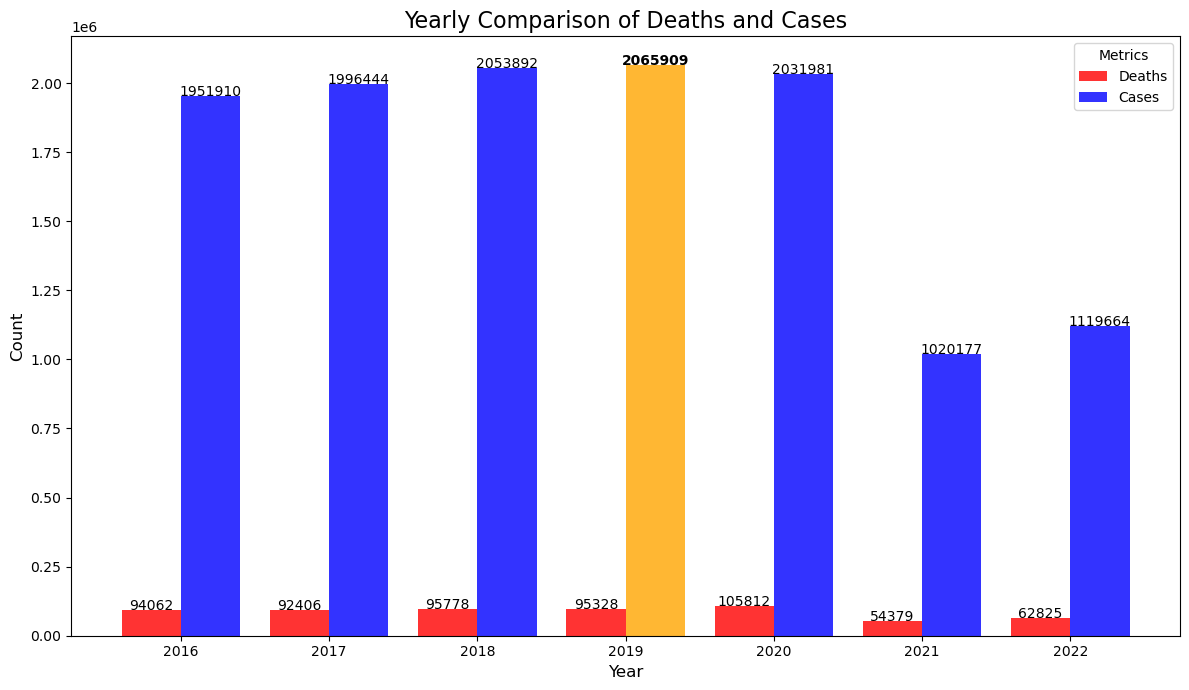

In [14]:


# Group data by Year and calculate total Deaths and Cases
yearly_data = Healthcare_Metrics.groupby('YEAR')[['Deaths', 'Cases']].sum()

# Find the year with the most cases
year_with_max_cases = yearly_data['Cases'].idxmax()

# Define custom colors: 'orange' for the year with the most cases, 'blue' for others
case_colors = ['orange' if year == year_with_max_cases else 'blue' for year in yearly_data.index]
death_colors = ['red' for _ in yearly_data.index]  # Keep death bars red

# Plot grouped bar chart
fig, ax = plt.subplots(figsize=(12, 7))
width = 0.4  # Bar width
x = range(len(yearly_data.index))  # X positions for bars

# Plot bars for deaths and cases
ax.bar(x, yearly_data['Deaths'], width, label='Deaths', color=death_colors, alpha=0.8)
ax.bar([p + width for p in x], yearly_data['Cases'], width, label='Cases', color=case_colors, alpha=0.8)

# Add chart title and labels
ax.set_title('Yearly Comparison of Deaths and Cases', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_xticks([p + width / 2 for p in x])
ax.set_xticklabels(yearly_data.index, fontsize=10)

# Add legend
ax.legend(title='Metrics', fontsize=10)

# Annotate the year with the most cases
for i, value in enumerate(yearly_data['Cases']):
    if yearly_data.index[i] == year_with_max_cases:
        ax.text(i + width, value + 500, f"{value:.0f}", ha='center', fontsize=10, color='black', fontweight='bold')
    else:
        ax.text(i + width, value + 500, f"{value:.0f}", ha='center', fontsize=10, color='black')

for i, value in enumerate(yearly_data['Deaths']):
    ax.text(i, value + 500, f"{value:.0f}", ha='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


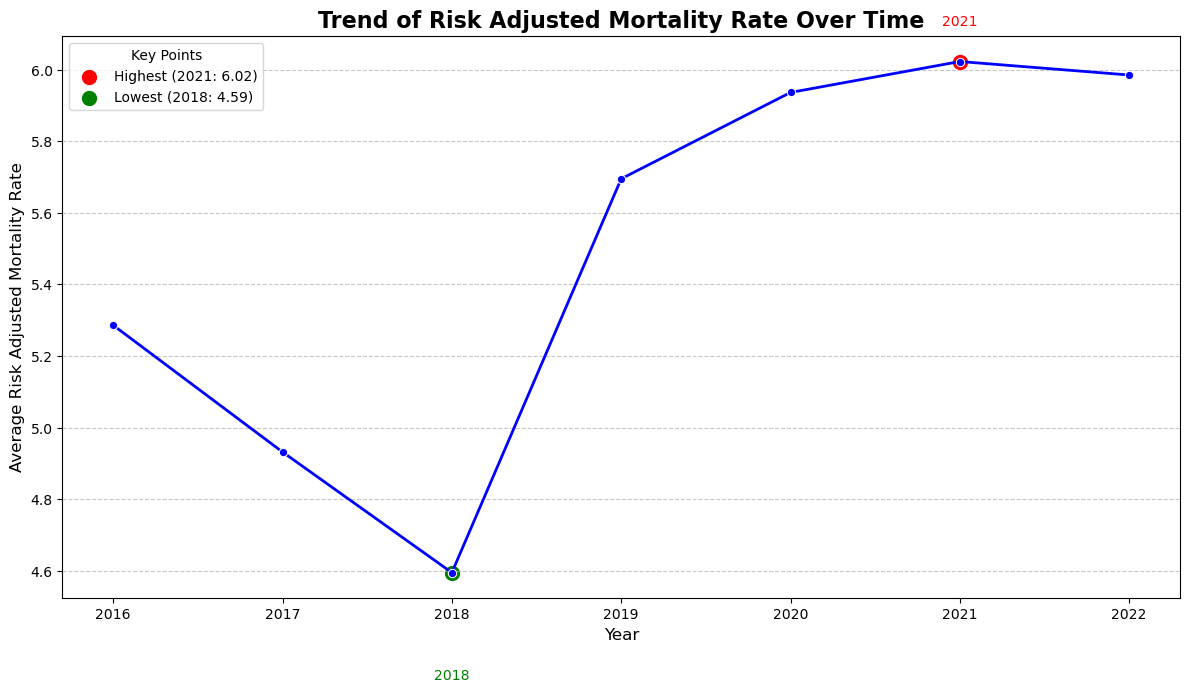

In [15]:

# Group data by Year and calculate average Risk Adjusted Mortality Rate
yearly_risk = Healthcare_Metrics.groupby('YEAR')['Risk Adjusted Mortality Rate'].mean()

# Identify key points (max/min years for highlighting)
year_with_max_risk = yearly_risk.idxmax()
year_with_min_risk = yearly_risk.idxmin()

# Plot the line chart
plt.figure(figsize=(12, 7))
sns.lineplot(data=yearly_risk, marker='o', color='blue', linewidth=2)

# Highlight max and min points with a different color
plt.scatter(year_with_max_risk, yearly_risk[year_with_max_risk], color='red', s=100, label=f'Highest ({year_with_max_risk}: {yearly_risk[year_with_max_risk]:.2f})')
plt.scatter(year_with_min_risk, yearly_risk[year_with_min_risk], color='green', s=100, label=f'Lowest ({year_with_min_risk}: {yearly_risk[year_with_min_risk]:.2f})')

# Add chart title and labels
plt.title('Trend of Risk Adjusted Mortality Rate Over Time', fontsize=16, weight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Risk Adjusted Mortality Rate', fontsize=12)

# Add annotations for max and min points
plt.text(year_with_max_risk, yearly_risk[year_with_max_risk] + 0.1, f'{year_with_max_risk}', ha='center', fontsize=10, color='red')
plt.text(year_with_min_risk, yearly_risk[year_with_min_risk] - 0.3, f'{year_with_min_risk}', ha='center', fontsize=10, color='green')  # Adjusted position for clarity

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Customize legend
plt.legend(title='Key Points', fontsize=10)

# Finalize layout
plt.tight_layout()
plt.show()
